Loading relevant libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Installing relevant libraries
!pip3 install Prophet

In [ ]:
!pip3 install pandas matplotlib scikit-learn

In [ ]:
!pip3 install pyarrow

loading libraries

In [ ]:
from prophet import Prophet
print("Prophet is installed and working!")

Prophet is installed and working!


In [ ]:
# Import libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

Daily Sunspots Forecasting

In [ ]:
file_path_daily = "/content/drive/MyDrive/Project 3/SN_d_tot_V2.0.csv"  # Replace with your file path

# Load the data with the correct delimiter
daily_sunspots_data = pd.read_csv(file_path_daily, delimiter=';', header=None)

# Add appropriate headers based on the structure
daily_sunspots_data.columns = ['Year', 'Month', 'Day', 'Decimal_Year', 'Sunspots', 'Smoothed_Sunspots', 'Other_Col', 'Indicator']

# Inspect the first few rows to understand its structure
daily_sunspots_data.head()

,Year,Month,Day,Decimal_Year,Sunspots,Smoothed_Sunspots,Other_Col,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [ ]:
# Select and convert the relevant columns
daily_sunspots_data['Date'] = pd.to_datetime(
    daily_sunspots_data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
)
daily_sunspots_data = daily_sunspots_data[['Date', 'Sunspots']].rename(columns={'Date': 'ds', 'Sunspots': 'y'})

# Preview the cleaned dataset
print(daily_sunspots_data.head())

          ds  y
0 1818-01-01 -1
1 1818-01-02 -1
2 1818-01-03 -1
3 1818-01-04 -1
4 1818-01-05 -1


In [ ]:
print(daily_sunspots_data.iloc[0])

ds    1818-01-01 00:00:00
y                      -1
Name: 0, dtype: object


In [ ]:
# Remove missing values
daily_sunspots_data = daily_sunspots_data[daily_sunspots_data['y'] >= 0]

In [ ]:
# Filter out rows with invalid sunspot values
daily_sunspots_data = daily_sunspots_data[daily_sunspots_data['y'] != -1]

In [ ]:
# Ensure datetime format
daily_sunspots_data['ds'] = pd.to_datetime(daily_sunspots_data['ds'])

# Convert y to numeric
daily_sunspots_data['y'] = pd.to_numeric(daily_sunspots_data['y'], errors='coerce')

In [ ]:
daily_sunspots_data.head()

,ds,y
7,1818-01-08,65
12,1818-01-13,37
16,1818-01-17,77
17,1818-01-18,98
18,1818-01-19,105


In [ ]:
daily_sunspots_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71383 entries, 7 to 74629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      71383 non-null  datetime64[ns]
 1   y       71383 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 MB


In [ ]:
# Drop NA or NULL values
daily_sunspots_data = daily_sunspots_data.dropna()

In [ ]:
# Fill NULL values
daily_sunspots_data['y'].fillna(daily_sunspots_data['y'].mean(), inplace=True)

<ipython-input-17-5ec07f4be8d1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_sunspots_data['y'].fillna(daily_sunspots_data['y'].mean(), inplace=True)


In [ ]:
# Save the cleaned data to a new CSV file
daily_sunspots_data.to_csv('cleaned_daily_sunspots.csv', index=False)

In [ ]:
# Train the model
model_daily = Prophet(yearly_seasonality=True)
model_daily.fit(daily_sunspots_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/2vcr3ckb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/94j7wozy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45452', 'data', 'file=/tmp/tmptiour4np/2vcr3ckb.json', 'init=/tmp/tmptiour4np/94j7wozy.json', 'output', 'file=/tmp/tmptiour4np/prophet_modelx3ero26g/prophet_model-20241130010805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:08:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict the future
daily_future = model_daily.make_future_dataframe(periods=365)  # Predicting 1 year ahead
daily_forecast = model_daily.predict(daily_future)

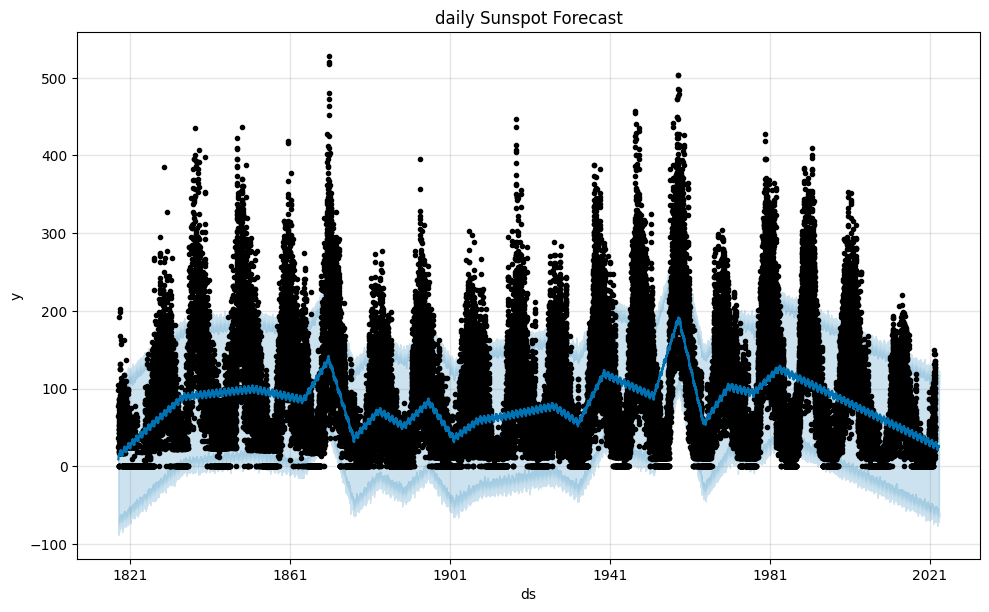

In [ ]:
# Plot the results
fig = model_daily.plot(daily_forecast)
plt.title('daily Sunspot Forecast')
plt.show()

Monthly Sunspots Forecasting


In [ ]:
file_path_monthly = "/content/drive/MyDrive/Project 3/SN_m_tot_V2.0.csv" # Replace with your File path

# load data with the correct delimiter
monthly_mean_data = pd.read_csv(file_path_monthly, sep =';')

# Assign appropriate column names for the monthly dataset
monthly_mean_data.columns = ['Year', 'Month', 'Date_Fraction', 'Sunspots', 'Std_Dev', 'Observations', 'Indicator']

# Inspect the first few rows to understand structure
monthly_mean_data.head()

,Year,Month,Date_Fraction,Sunspots,Std_Dev,Observations,Indicator
0,1749,2,1749.123,104.3,-1.0,-1,1
1,1749,3,1749.204,116.7,-1.0,-1,1
2,1749,4,1749.288,92.8,-1.0,-1,1
3,1749,5,1749.371,141.7,-1.0,-1,1
4,1749,6,1749.455,139.2,-1.0,-1,1


In [ ]:
# Date time formatting
monthly_mean_data['Date'] = pd.to_datetime(monthly_mean_data[['Year', 'Month']].assign(Day=1))

In [ ]:
# Prepare data for FBProphet
monthly_mean_data = monthly_mean_data[['Date', 'Sunspots']].rename(columns={'Date': 'ds', 'Sunspots': 'y'})

In [ ]:
# Check the prepared data
monthly_mean_data.head()

,ds,y
0,1749-02-01,104.3
1,1749-03-01,116.7
2,1749-04-01,92.8
3,1749-05-01,141.7
4,1749-06-01,139.2


In [ ]:
# remove missing values
monthly_mean_data = monthly_mean_data[monthly_mean_data['y'] >= 0]

In [ ]:
# Save the cleaned data to a new CSV file
monthly_mean_data.to_csv('cleaned_monthly_sunspots.csv', index=False)

In [ ]:
# train the model
model_monthly = Prophet(yearly_seasonality=True)
model_monthly.fit(monthly_mean_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/lpd0xq83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/ht9kktd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37373', 'data', 'file=/tmp/tmptiour4np/lpd0xq83.json', 'init=/tmp/tmptiour4np/ht9kktd8.json', 'output', 'file=/tmp/tmptiour4np/prophet_modelhhqa4gj7/prophet_model-20241130011810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict the future
monthly_future = model_monthly.make_future_dataframe(periods=9)  # Predicting 1 year ahead
monthly_forecast = model_monthly.predict(monthly_future)

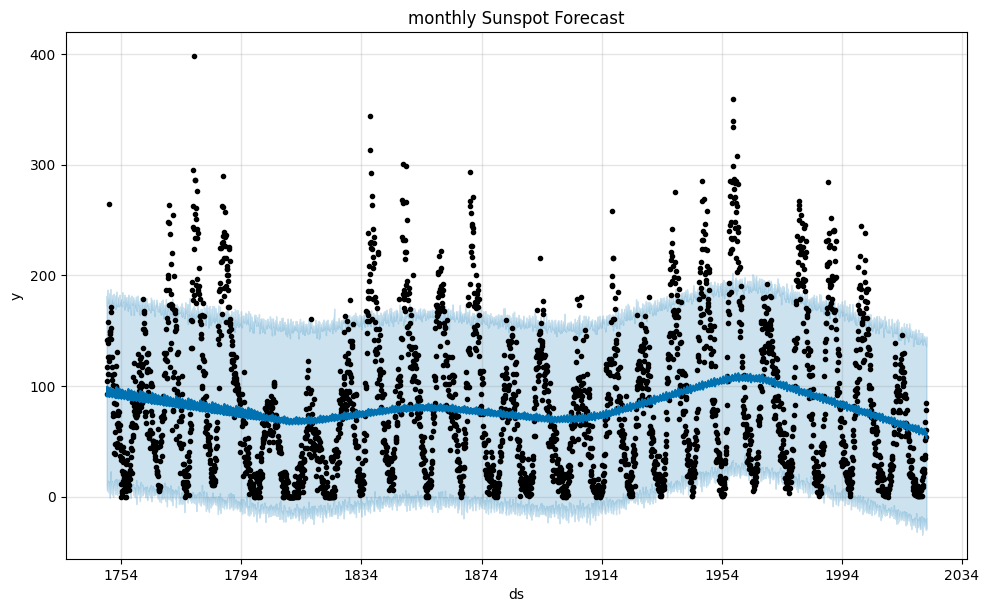

In [ ]:
# Plot the results
fig = model_monthly.plot(monthly_forecast)
plt.title('monthly Sunspot Forecast')
plt.show()

Yearly Sunspots Forecasting

In [ ]:
file_path_yearly = "/content/drive/MyDrive/Project 3/SN_y_tot_V2.0.csv" # Replace with your File path

# load data with the correct delimiter
yearly_mean_data = pd.read_csv(file_path_yearly, sep =';')

# Assign appropriate column names for the yearly dataset
yearly_mean_data.columns = ['Year', 'Sunspots', 'Std_Dev', 'Observations', 'Indicator']

# Inspect the first few rows to understand structure
yearly_mean_data.head()

,Year,Sunspots,Std_Dev,Observations,Indicator
0,1701.5,18.3,-1.0,-1,1
1,1702.5,26.7,-1.0,-1,1
2,1703.5,38.3,-1.0,-1,1
3,1704.5,60.0,-1.0,-1,1
4,1705.5,96.7,-1.0,-1,1


In [ ]:
# Add date Column
yearly_mean_data['Date'] = pd.to_datetime(yearly_mean_data['Year'], format='%Y')

In [ ]:
print(yearly_mean_data)

       Year  Sunspots  Std_Dev  Observations  Indicator       Date
0    1701.5      18.3     -1.0            -1          1 1701-01-01
1    1702.5      26.7     -1.0            -1          1 1702-01-01
2    1703.5      38.3     -1.0            -1          1 1703-01-01
3    1704.5      60.0     -1.0            -1          1 1704-01-01
4    1705.5      96.7     -1.0            -1          1 1705-01-01
..      ...       ...      ...           ...        ...        ...
316  2017.5      21.7      2.5         11444          1 2017-01-01
317  2018.5       7.0      1.1         12611          1 2018-01-01
318  2019.5       3.6      0.5         12884          1 2019-01-01
319  2020.5       8.8      4.1         14440          1 2020-01-01
320  2021.5      29.6      7.9         15233          1 2021-01-01

[321 rows x 6 columns]


In [ ]:
# Filter the DataFrame to include only rows starting from 1800
filtered_yearly_data = yearly_mean_data[yearly_mean_data['Year'] >= 1800]

In [ ]:
print(filtered_yearly_data)

       Year  Sunspots  Std_Dev  Observations  Indicator       Date
99   1800.5      24.2     -1.0            -1          1 1800-01-01
100  1801.5      56.7     -1.0            -1          1 1801-01-01
101  1802.5      75.0     -1.0            -1          1 1802-01-01
102  1803.5      71.8     -1.0            -1          1 1803-01-01
103  1804.5      79.2     -1.0            -1          1 1804-01-01
..      ...       ...      ...           ...        ...        ...
316  2017.5      21.7      2.5         11444          1 2017-01-01
317  2018.5       7.0      1.1         12611          1 2018-01-01
318  2019.5       3.6      0.5         12884          1 2019-01-01
319  2020.5       8.8      4.1         14440          1 2020-01-01
320  2021.5      29.6      7.9         15233          1 2021-01-01

[222 rows x 6 columns]


In [ ]:
# Ensure the 'Date' column is properly formatted as datetime
filtered_yearly_data['Date'] = pd.to_datetime(filtered_yearly_data['Year'].astype(int), format='%Y')

# Rename columns to fit Prophet's requirements
filtered_yearly_data = filtered_yearly_data[['Date', 'Sunspots']].rename(columns={'Date': 'ds', 'Sunspots': 'y'})

# Check the range after filtering
print(filtered_yearly_data['ds'].min(), filtered_yearly_data['ds'].max())

1800-01-01 00:00:00 2021-01-01 00:00:00


<ipython-input-38-e49e4697ae8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_yearly_data['Date'] = pd.to_datetime(filtered_yearly_data['Year'].astype(int), format='%Y')


In [ ]:
print(filtered_yearly_data)

            ds     y
99  1800-01-01  24.2
100 1801-01-01  56.7
101 1802-01-01  75.0
102 1803-01-01  71.8
103 1804-01-01  79.2
..         ...   ...
316 2017-01-01  21.7
317 2018-01-01   7.0
318 2019-01-01   3.6
319 2020-01-01   8.8
320 2021-01-01  29.6

[222 rows x 2 columns]


In [ ]:
# Remove missing values
filtered_yearly_data = filtered_yearly_data[filtered_yearly_data['y'] >= 0]

In [ ]:
# Filter out rows with invalid sunspot values
filtered_yearly_data = filtered_yearly_data[filtered_yearly_data['y'] != -1]

In [ ]:
filtered_yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 99 to 320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      222 non-null    datetime64[ns]
 1   y       222 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.2 KB


In [ ]:
# Ensure datetime format
filtered_yearly_data['ds'] = pd.to_datetime(filtered_yearly_data['ds'])

# Convert y to numeric
filtered_yearly_data['y'] = pd.to_numeric(filtered_yearly_data['y'], errors='coerce')

In [ ]:
filtered_yearly_data.head()

,ds,y
99,1800-01-01,24.2
100,1801-01-01,56.7
101,1802-01-01,75.0
102,1803-01-01,71.8
103,1804-01-01,79.2


In [ ]:
# Drop NA or NULL values
filtered_yearly_data = filtered_yearly_data.dropna()

In [ ]:
# Fill NULL values
filtered_yearly_data['y'].fillna(filtered_yearly_data['y'].mean(), inplace=True)

<ipython-input-46-79fa100f2307>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_yearly_data['y'].fillna(filtered_yearly_data['y'].mean(), inplace=True)


In [ ]:
# Save the cleaned data to a new CSV file
filtered_yearly_data.to_csv('cleaned_yearly_sunspots.csv', index=False)

In [ ]:
# train the model
model_yearly = Prophet(yearly_seasonality=True)
model_yearly.fit(filtered_yearly_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/zcce1v6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/thu7_he2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27587', 'data', 'file=/tmp/tmptiour4np/zcce1v6q.json', 'init=/tmp/tmptiour4np/thu7_he2.json', 'output', 'file=/tmp/tmptiour4np/prophet_model4qw8sxmi/prophet_model-20241130011930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:19:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict the future
yearly_future = model_yearly.make_future_dataframe(periods=20)  # Predicting 1 year ahead
yearly_forecast = model_yearly.predict(yearly_future)

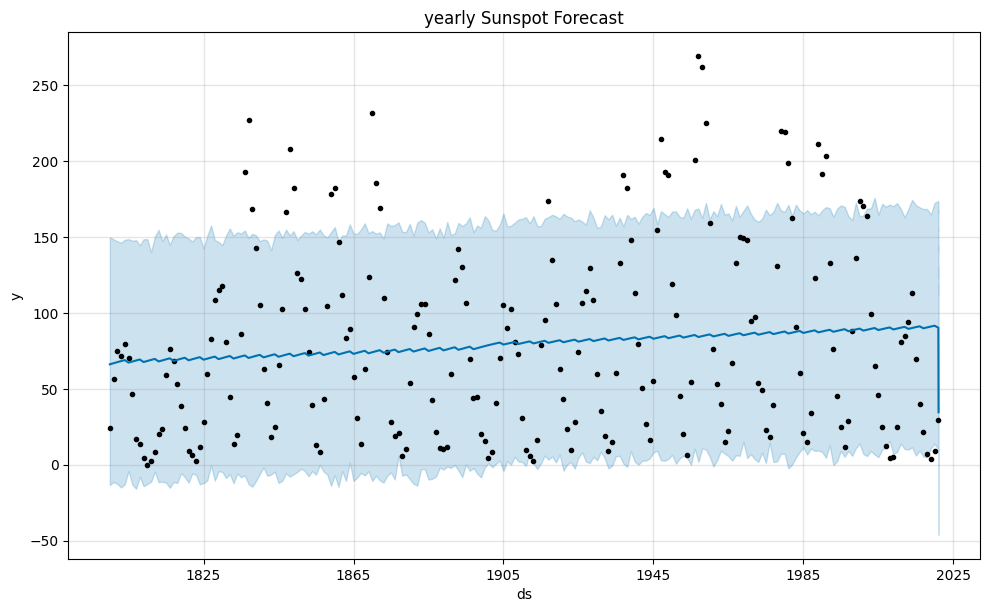

In [ ]:
# Plot the results
fig = model_yearly.plot(yearly_forecast)
plt.title('yearly Sunspot Forecast')
plt.show()

tuning the model for daily sunspots with evaluation metrics

In [ ]:
# Load your dataset
cleaned_daily_sunspots = pd.read_csv("cleaned_daily_sunspots.csv")

# Rename columns for Prophet compatibility
cleaned_daily_sunspots = cleaned_daily_sunspots.rename(columns={'Date': 'ds', 'Sunspots': 'y'})

# Example upper bound for logistic growth
cleaned_daily_sunspots['cap'] = cleaned_daily_sunspots['y'].max() * 1.5

# Tuning the FBProphet model
# Initialize the model
tuned_daily_model = Prophet(
    growth='linear',  # Forecasting growth options: 'logistic', 'linear'
    daily_seasonality=True,
    changepoint_prior_scale=0.1,  # Controls flexibility of the trend
    n_changepoints=25  # Number of trend changepoints
)

# Add manual seasonality
tuned_daily_model.add_seasonality(name='biannual', period=182.5, fourier_order=10)  # Adjust period and order
tuned_daily_model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
tuned_daily_model.fit(cleaned_daily_sunspots)

DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/h9maviy_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/y7jtnjj4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68975', 'data', 'file=/tmp/tmptiour4np/h9maviy_.json', 'init=/tmp/tmptiour4np/y7jtnjj4.json', 'output', 'file=/tmp/tmptiour4np/prophet_modelskl4vefk/prophet_model-20241130012203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:25:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:

# Create future dataframe
tuned_daily_future = tuned_daily_model.make_future_dataframe(periods=365)  # Predict next 365 days

# Make predictions
tuned_daily_forecast = tuned_daily_model.predict(tuned_daily_future)
tuned_daily_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,biannual,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1818-01-08,52.973712,-91.941914,79.831011,52.973712,52.973712,-51.374145,-51.374145,-51.374145,-1.197719,...,0.106336,0.106336,0.106336,-6.444427,-6.444427,-6.444427,0.0,0.0,0.0,1.599567
1,1818-01-13,53.045857,-78.815345,89.726727,53.045857,53.045857,-48.852479,-48.852479,-48.852479,0.885007,...,0.037803,0.037803,0.037803,-6.690769,-6.690769,-6.690769,0.0,0.0,0.0,4.193378
2,1818-01-17,53.103573,-78.173058,96.594537,53.103573,53.103573,-45.902418,-45.902418,-45.902418,2.416954,...,-0.057912,-0.057912,-0.057912,-6.280643,-6.280643,-6.280643,0.0,0.0,0.0,7.201155
3,1818-01-18,53.118002,-84.896725,98.663045,53.118002,53.118002,-45.408637,-45.408637,-45.408637,2.593585,...,-0.119128,-0.119128,-0.119128,-6.107678,-6.107678,-6.107678,0.0,0.0,0.0,7.709364
4,1818-01-19,53.132431,-81.054718,94.320868,53.132431,53.132431,-44.798219,-44.798219,-44.798219,2.659003,...,0.084588,0.084588,0.084588,-5.911528,-5.911528,-5.911528,0.0,0.0,0.0,8.334212


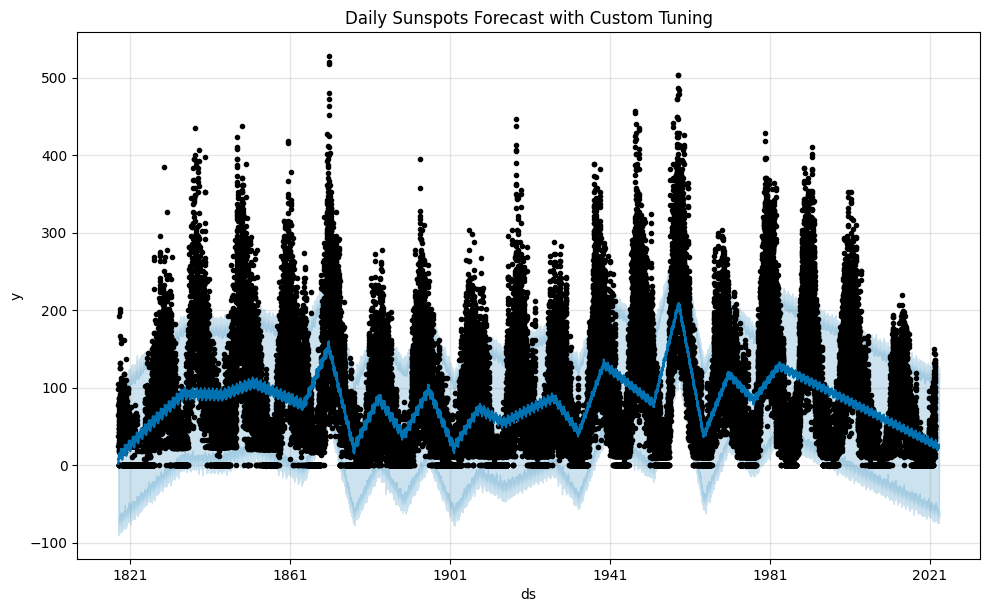

In [ ]:
# Plot historical and predicted data
fig = tuned_daily_model.plot(tuned_daily_forecast)
plt.title("Daily Sunspots Forecast with Custom Tuning")
plt.show()

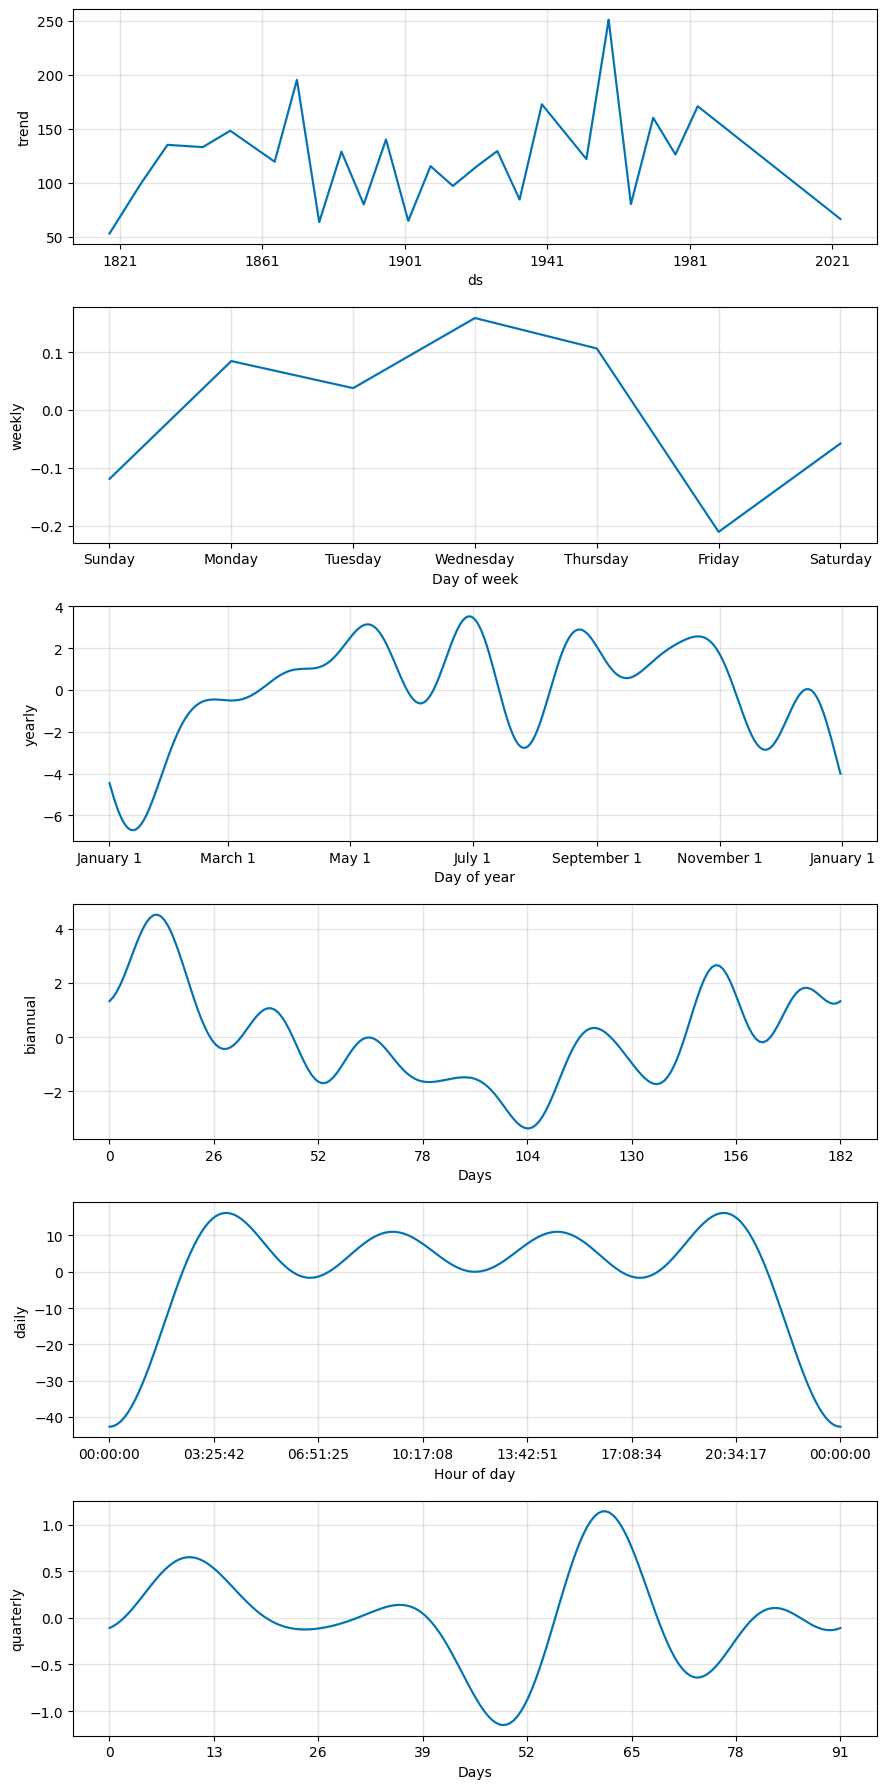

In [ ]:
# Plot forecast components
fig_components = tuned_daily_model.plot_components(tuned_daily_forecast)
plt.show()

In [ ]:
forecast_with_actuals = tuned_daily_forecast.set_index('ds').join(cleaned_daily_sunspots.set_index('ds'), how='left')
forecast_with_actuals.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,biannual,biannual_lower,...,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,cap
ds,,,,,,,,,,,,,,,,,,,,,
1818-01-08 00:00:00,52.973712,-91.941914,79.831011,52.973712,52.973712,-51.374145,-51.374145,-51.374145,-1.197719,-1.197719,...,0.106336,-6.444427,-6.444427,-6.444427,0.0,0.0,0.0,1.599567,NaN,NaN
1818-01-13 00:00:00,53.045857,-78.815345,89.726727,53.045857,53.045857,-48.852479,-48.852479,-48.852479,0.885007,0.885007,...,0.037803,-6.690769,-6.690769,-6.690769,0.0,0.0,0.0,4.193378,NaN,NaN
1818-01-17 00:00:00,53.103573,-78.173058,96.594537,53.103573,53.103573,-45.902418,-45.902418,-45.902418,2.416954,2.416954,...,-0.057912,-6.280643,-6.280643,-6.280643,0.0,0.0,0.0,7.201155,NaN,NaN
1818-01-18 00:00:00,53.118002,-84.896725,98.663045,53.118002,53.118002,-45.408637,-45.408637,-45.408637,2.593585,2.593585,...,-0.119128,-6.107678,-6.107678,-6.107678,0.0,0.0,0.0,7.709364,NaN,NaN
1818-01-19 00:00:00,53.132431,-81.054718,94.320868,53.132431,53.132431,-44.798219,-44.798219,-44.798219,2.659003,2.659003,...,0.084588,-5.911528,-5.911528,-5.911528,0.0,0.0,0.0,8.334212,NaN,NaN


In [ ]:
# Debugging: Check for overlap
print(f"Total rows in forecast_with_actuals: {forecast_with_actuals.shape[0]}")
print(f"Rows with valid actual values (y): {forecast_with_actuals['y'].notna().sum()}")
print(f"Rows with valid predicted values (yhat): {forecast_with_actuals['yhat'].notna().sum()}")

# Inspect the first few rows of the joined dataframe
print(forecast_with_actuals.head())


Total rows in forecast_with_actuals: 71748
Rows with valid actual values (y): 0
Rows with valid predicted values (yhat): 71748
                         trend  yhat_lower  yhat_upper  trend_lower  \
ds                                                                    
1818-01-08 00:00:00  52.973712  -91.941914   79.831011    52.973712   
1818-01-13 00:00:00  53.045857  -78.815345   89.726727    53.045857   
1818-01-17 00:00:00  53.103573  -78.173058   96.594537    53.103573   
1818-01-18 00:00:00  53.118002  -84.896725   98.663045    53.118002   
1818-01-19 00:00:00  53.132431  -81.054718   94.320868    53.132431   

                     trend_upper  additive_terms  additive_terms_lower  \
ds                                                                       
1818-01-08 00:00:00    52.973712      -51.374145            -51.374145   
1818-01-13 00:00:00    53.045857      -48.852479            -48.852479   
1818-01-17 00:00:00    53.103573      -45.902418            -45.902418   
1818-

In [ ]:
print("Forecast dates:")
print(tuned_daily_forecast['ds'].head(), tuned_daily_forecast['ds'].tail())

print("Actual data dates:")
print(cleaned_daily_sunspots['ds'].head(), cleaned_daily_sunspots['ds'].tail())

Forecast dates:
0   1818-01-08
1   1818-01-13
2   1818-01-17
3   1818-01-18
4   1818-01-19
Name: ds, dtype: datetime64[ns] 71743   2023-04-26
71744   2023-04-27
71745   2023-04-28
71746   2023-04-29
71747   2023-04-30
Name: ds, dtype: datetime64[ns]
Actual data dates:
0    1818-01-08
1    1818-01-13
2    1818-01-17
3    1818-01-18
4    1818-01-19
Name: ds, dtype: object 71378    2022-04-26
71379    2022-04-27
71380    2022-04-28
71381    2022-04-29
71382    2022-04-30
Name: ds, dtype: object


In [ ]:
forecast_range = (tuned_daily_forecast['ds'].min(), tuned_daily_forecast['ds'].max())
actual_range = (cleaned_daily_sunspots['ds'].min(), cleaned_daily_sunspots['ds'].max())

print(f"Forecast date range: {forecast_range}")
print(f"Actual date range: {actual_range}")

Forecast date range: (Timestamp('1818-01-08 00:00:00'), Timestamp('2023-04-30 00:00:00'))
Actual date range: ('1818-01-08', '2022-04-30')


In [ ]:
# Convert 'ds' to datetime
tuned_daily_forecast['ds'] = pd.to_datetime(tuned_daily_forecast['ds'], errors='coerce')
cleaned_daily_sunspots['ds'] = pd.to_datetime(cleaned_daily_sunspots['ds'], errors='coerce')

# Verify the conversion
print(tuned_daily_forecast['ds'].dtype)  # Should print datetime64[ns]
print(cleaned_daily_sunspots['ds'].dtype)  # Should print datetime64[ns]


datetime64[ns]
datetime64[ns]


In [ ]:
common_start = max(tuned_daily_forecast['ds'].min(), cleaned_daily_sunspots['ds'].min())
common_end = min(tuned_daily_forecast['ds'].max(), cleaned_daily_sunspots['ds'].max())

print(f"Common date range: {common_start} to {common_end}")

Common date range: 1818-01-08 00:00:00 to 2022-04-30 00:00:00


In [ ]:
tuned_daily_forecast = tuned_daily_forecast[(tuned_daily_forecast['ds'] >= common_start) &
                                            (tuned_daily_forecast['ds'] <= common_end)]

cleaned_daily_sunspots = cleaned_daily_sunspots[(cleaned_daily_sunspots['ds'] >= common_start) &
                                                (cleaned_daily_sunspots['ds'] <= common_end)]

print(f"Filtered forecast shape: {tuned_daily_forecast.shape}")
print(f"Filtered actuals shape: {cleaned_daily_sunspots.shape}")


Filtered forecast shape: (71383, 28)
Filtered actuals shape: (71383, 3)


In [ ]:
# Filter the forecast to the historical data range for evaluation
forecast_with_actuals = tuned_daily_forecast.set_index('ds').join(cleaned_daily_sunspots.set_index('ds'), how='left')
actual = forecast_with_actuals['y'].dropna()
predicted = forecast_with_actuals.loc[actual.index, 'yhat']

# Calculate evaluation metrics
mae = mean_absolute_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)
r2 = r2_score(actual, predicted)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

MAE: 54.16896739637692
MAPE: 4.5902502542320136e+16
R2 Score: 0.20567386167885437


tuning the model for monthly sunspots with evaluation metrics

In [ ]:

# Load your dataset
cleaned_monthly_sunspots = pd.read_csv("cleaned_monthly_sunspots.csv")

# Rename columns for Prophet compatibility
cleaned_monthly_sunspots = cleaned_monthly_sunspots.rename(columns={'Date': 'ds', 'Sunspots': 'y'})

# Example upper bound for logistic growth
cleaned_monthly_sunspots['cap'] = cleaned_monthly_sunspots['y'].max() * 1.5

# Tuning the FBProphet model
# Initialize the model
tuned_monthly_model = Prophet(
    growth='linear',  # Forecasting growth options: 'logistic', 'linear'
    yearly_seasonality=False,
    weekly_seasonality=False,
    changepoint_prior_scale=0.1,  # Flexibility of the trend
    n_changepoints=25  # Number of changepoints
)

# Add manual seasonality
tuned_monthly_model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)
tuned_monthly_model.add_seasonality(name='monthly', period=30.4, fourier_order=5)

# Fit the model
tuned_monthly_model.fit(cleaned_monthly_sunspots)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/hxb72q1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/eco0obgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80012', 'data', 'file=/tmp/tmptiour4np/hxb72q1h.json', 'init=/tmp/tmptiour4np/eco0obgb.json', 'output', 'file=/tmp/tmptiour4np/prophet_modeli6jtx4ky/prophet_model-20241130013116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:31:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:31:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dataframe
tuned_monthly_future = tuned_monthly_model.make_future_dataframe(periods=9)
# tuned_monthly_future = tuned_monthly_future.iloc[[1, 6, 9]]

# Make predictions
tuned_monthly_forecast = tuned_monthly_model.predict(tuned_monthly_future)
tuned_monthly_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,quarterly,quarterly_lower,quarterly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1749-02-01,93.580584,3.977109,164.771664,93.580584,93.580584,-6.082145,-6.082145,-6.082145,-9.128002,-9.128002,-9.128002,3.045856,3.045856,3.045856,0.0,0.0,0.0,87.498439
1,1749-03-01,93.600785,13.966927,176.962584,93.600785,93.600785,3.424801,3.424801,3.424801,-8.841943,-8.841943,-8.841943,12.266744,12.266744,12.266744,0.0,0.0,0.0,97.025585
2,1749-04-01,93.623150,21.896066,183.644248,93.623150,93.623150,2.821256,2.821256,2.821256,-5.320228,-5.320228,-5.320228,8.141484,8.141484,8.141484,0.0,0.0,0.0,96.444405
3,1749-05-01,93.644793,14.926249,176.162620,93.644793,93.644793,3.492468,3.492468,3.492468,-7.510191,-7.510191,-7.510191,11.002660,11.002660,11.002660,0.0,0.0,0.0,97.137262
4,1749-06-01,93.667158,14.977155,180.128240,93.667158,93.667158,5.104355,5.104355,5.104355,-4.560006,-4.560006,-4.560006,9.664360,9.664360,9.664360,0.0,0.0,0.0,98.771513


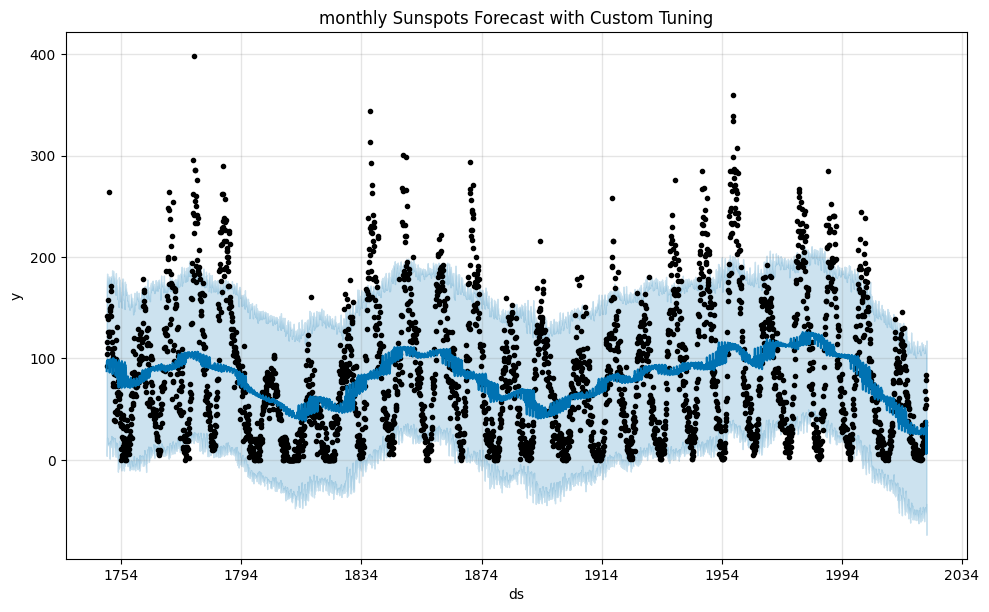

In [ ]:
# Plot historical and predicted data
fig = tuned_monthly_model.plot(tuned_monthly_forecast)
plt.title("monthly Sunspots Forecast with Custom Tuning")
plt.show()

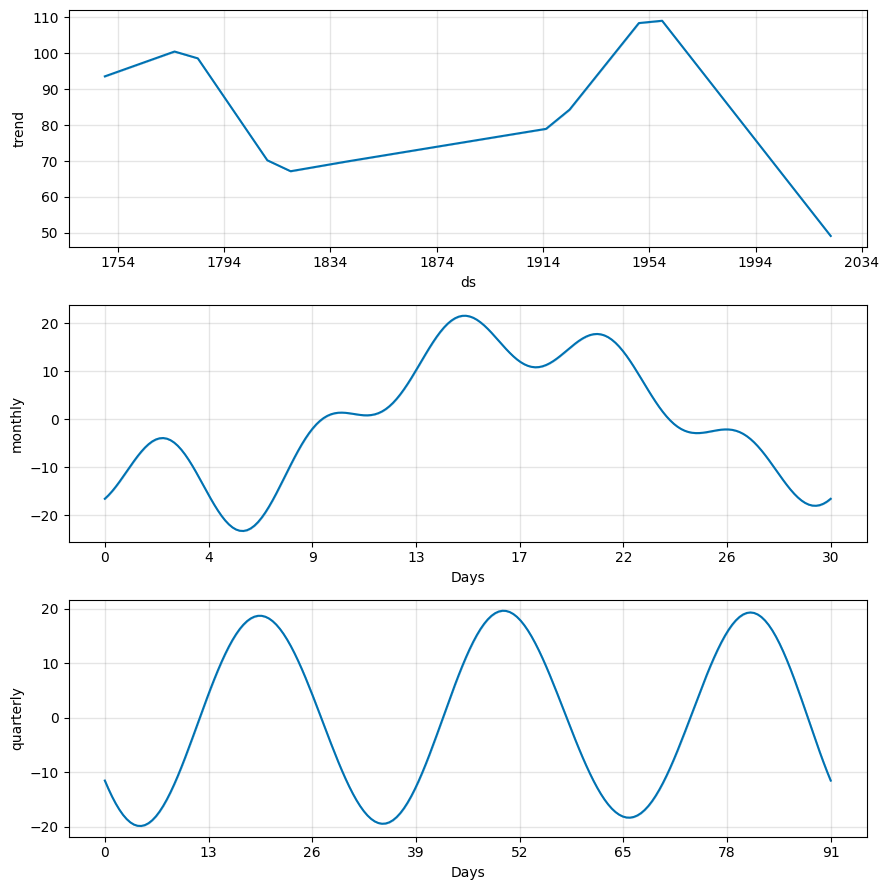

In [ ]:
# Plot forecast components
fig_components = tuned_monthly_model.plot_components(tuned_monthly_forecast)
plt.show()

In [ ]:
forecast_with_actuals = tuned_monthly_forecast.set_index('ds').join(cleaned_monthly_sunspots.set_index('ds'), how='left')
forecast_with_actuals.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,quarterly,quarterly_lower,quarterly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,cap
ds,,,,,,,,,,,,,,,,,,,,
1749-02-01 00:00:00,93.580584,3.977109,164.771664,93.580584,93.580584,-6.082145,-6.082145,-6.082145,-9.128002,-9.128002,-9.128002,3.045856,3.045856,3.045856,0.0,0.0,0.0,87.498439,NaN,NaN
1749-03-01 00:00:00,93.600785,13.966927,176.962584,93.600785,93.600785,3.424801,3.424801,3.424801,-8.841943,-8.841943,-8.841943,12.266744,12.266744,12.266744,0.0,0.0,0.0,97.025585,NaN,NaN
1749-04-01 00:00:00,93.623150,21.896066,183.644248,93.623150,93.623150,2.821256,2.821256,2.821256,-5.320228,-5.320228,-5.320228,8.141484,8.141484,8.141484,0.0,0.0,0.0,96.444405,NaN,NaN
1749-05-01 00:00:00,93.644793,14.926249,176.162620,93.644793,93.644793,3.492468,3.492468,3.492468,-7.510191,-7.510191,-7.510191,11.002660,11.002660,11.002660,0.0,0.0,0.0,97.137262,NaN,NaN
1749-06-01 00:00:00,93.667158,14.977155,180.128240,93.667158,93.667158,5.104355,5.104355,5.104355,-4.560006,-4.560006,-4.560006,9.664360,9.664360,9.664360,0.0,0.0,0.0,98.771513,NaN,NaN


In [ ]:
# Filter the forecast to the historical data range for evaluation
forecast_with_actuals = tuned_monthly_forecast.set_index('ds').join(cleaned_monthly_sunspots.set_index('ds'), how='left')
actual = forecast_with_actuals['monthly'].dropna()
predicted = forecast_with_actuals.loc[actual.index, 'trend']

# Calculate evaluation metrics
mae = mean_absolute_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)
r2 = r2_score(actual, predicted)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

MAE: 82.23362985307222
MAPE: 24.043702158576902
R2 Score: -43.37720959634839


tuning the model for yearly Sunspots with evaluation metrics

In [ ]:

# Load your dataset
cleaned_yearly_sunspots = pd.read_csv("cleaned_yearly_sunspots.csv")

# Rename columns for Prophet compatibility
cleaned_yearly_sunspots = cleaned_yearly_sunspots.rename(columns={'Date': 'ds', 'Sunspots': 'y'})

# Example upper bound for logistic growth
cleaned_yearly_sunspots['cap'] = cleaned_yearly_sunspots['y'].max() * 1.5

# Tuning the FBProphet model
# Initialize the model
tuned_yearly_model = Prophet(
    growth='linear',  # Forecasting growth options: 'logistic', 'linear'
    yearly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.1,  # Controls flexibility of the trend
    n_changepoints=25  # Number of trend changepoints
)

# Add manual seasonality
tuned_yearly_model.add_seasonality(name='biannual', period=182.5, fourier_order=10)  # Adjust period and order
tuned_yearly_model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model
tuned_yearly_model.fit(cleaned_yearly_sunspots)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/sbp125s2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptiour4np/ex3f5aqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50785', 'data', 'file=/tmp/tmptiour4np/sbp125s2.json', 'init=/tmp/tmptiour4np/ex3f5aqp.json', 'output', 'file=/tmp/tmptiour4np/prophet_modelh1qu2zl9/prophet_model-20241130013929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:39:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:39:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:

# Create future dataframe
tuned_yearly_future = tuned_yearly_model.make_future_dataframe(periods=20)  # Predict next 365 days

# Make predictions
tuned_yearly_forecast = tuned_yearly_model.predict(tuned_yearly_future)
tuned_yearly_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,biannual,...,quarterly,quarterly_lower,quarterly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1800-01-01,27.159444,-27.107366,109.024945,27.159444,27.159444,14.009650,14.009650,14.009650,-18.230567,...,-9.771522,-9.771522,-9.771522,30.124622,30.124622,30.124622,0.0,0.0,0.0,41.169094
1,1801-01-01,27.185192,-30.604540,117.353706,27.185192,27.185192,13.949128,13.949128,13.949128,-18.230567,...,-9.771522,-9.771522,-9.771522,30.064099,30.064099,30.064099,0.0,0.0,0.0,41.134320
2,1802-01-01,27.210940,-31.180335,115.749090,27.210940,27.210940,13.867025,13.867025,13.867025,-18.230567,...,-9.771522,-9.771522,-9.771522,29.981996,29.981996,29.981996,0.0,0.0,0.0,41.077965
3,1803-01-01,27.236689,-32.577444,112.073259,27.236689,27.236689,13.763442,13.763442,13.763442,-18.230567,...,-9.771522,-9.771522,-9.771522,29.878413,29.878413,29.878413,0.0,0.0,0.0,41.000131
4,1804-01-01,27.262437,-29.363606,121.579313,27.262437,27.262437,13.638504,13.638504,13.638504,-18.230567,...,-9.771522,-9.771522,-9.771522,29.753476,29.753476,29.753476,0.0,0.0,0.0,40.900942


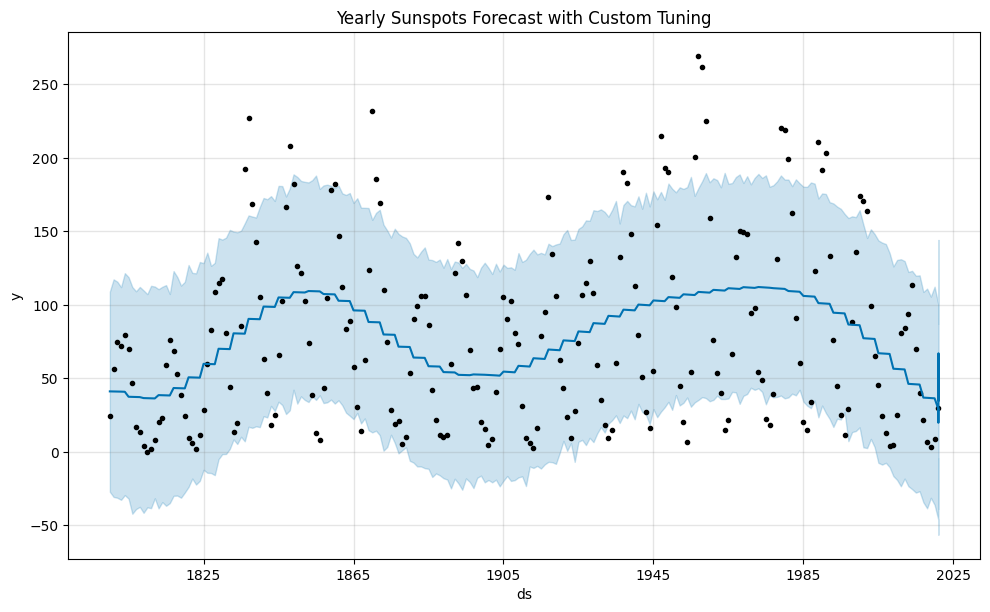

In [ ]:
# Plot historical and predicted data
fig = tuned_yearly_model.plot(tuned_yearly_forecast)
plt.title("Yearly Sunspots Forecast with Custom Tuning")
plt.show()

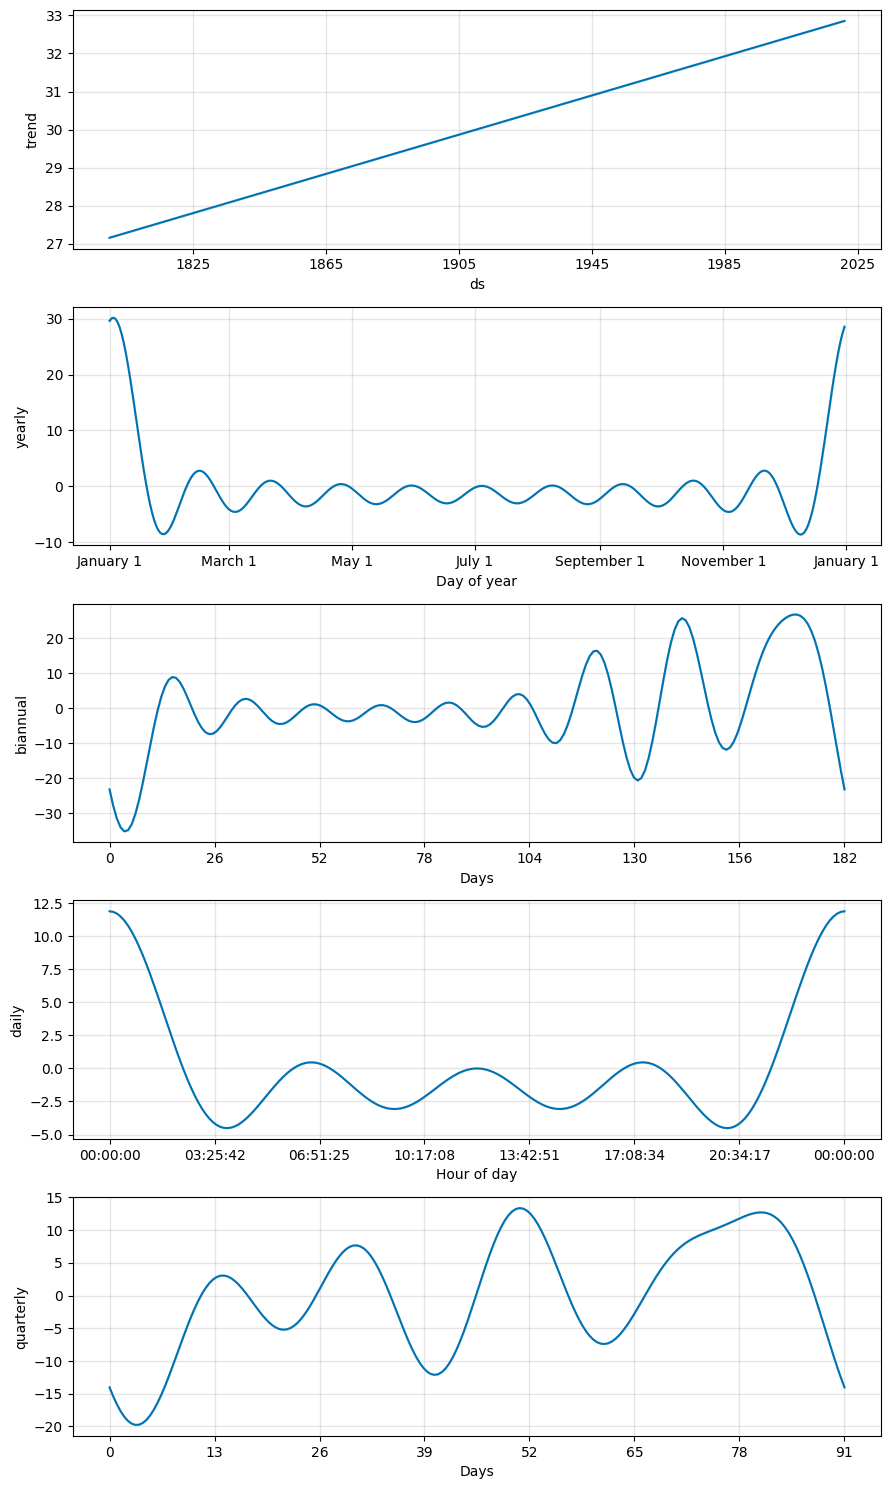

In [ ]:
# Plot forecast components
fig_components = tuned_yearly_model.plot_components(tuned_yearly_forecast)
plt.show()

In [ ]:
forecast_with_actuals = tuned_yearly_forecast.set_index('ds').join(cleaned_yearly_sunspots.set_index('ds'), how='left')
forecast_with_actuals.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,biannual,biannual_lower,...,quarterly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,cap
ds,,,,,,,,,,,,,,,,,,,,,
1800-01-01 00:00:00,27.159444,-27.107366,109.024945,27.159444,27.159444,14.009650,14.009650,14.009650,-18.230567,-18.230567,...,-9.771522,30.124622,30.124622,30.124622,0.0,0.0,0.0,41.169094,NaN,NaN
1801-01-01 00:00:00,27.185192,-30.604540,117.353706,27.185192,27.185192,13.949128,13.949128,13.949128,-18.230567,-18.230567,...,-9.771522,30.064099,30.064099,30.064099,0.0,0.0,0.0,41.134320,NaN,NaN
1802-01-01 00:00:00,27.210940,-31.180335,115.749090,27.210940,27.210940,13.867025,13.867025,13.867025,-18.230567,-18.230567,...,-9.771522,29.981996,29.981996,29.981996,0.0,0.0,0.0,41.077965,NaN,NaN
1803-01-01 00:00:00,27.236689,-32.577444,112.073259,27.236689,27.236689,13.763442,13.763442,13.763442,-18.230567,-18.230567,...,-9.771522,29.878413,29.878413,29.878413,0.0,0.0,0.0,41.000131,NaN,NaN
1804-01-01 00:00:00,27.262437,-29.363606,121.579313,27.262437,27.262437,13.638504,13.638504,13.638504,-18.230567,-18.230567,...,-9.771522,29.753476,29.753476,29.753476,0.0,0.0,0.0,40.900942,NaN,NaN


In [ ]:

# Filter the forecast to the historical data range for evaluation
forecast_with_actuals = tuned_yearly_forecast.set_index('ds').join(cleaned_yearly_sunspots.set_index('ds'), how='left')
actual = forecast_with_actuals['yearly'].dropna()
predicted = forecast_with_actuals.loc[actual.index, 'trend']

# Calculate evaluation metrics
mae = mean_absolute_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)
r2 = r2_score(actual, predicted)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

MAE: 2.9388193748089444
MAPE: 0.535268377408524
R2 Score: -0.5285988889849229
